# EDA Students Performance in Exams
`Dines Nimalthas`

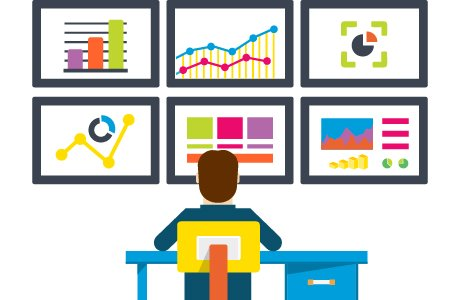

### Imports

In [102]:
# Pandas
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
# Farben von Pyplot
from matplotlib.colors import ListedColormap

# Numpy (performante listen)
import numpy as np

# Datasets, Klassifikatoren und Beurteilungshelfer
from sklearn import svm, metrics, neighbors, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('drive/MyDrive/ML/exams.csv')

## Variablen analysieren

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Verteilung mit Diagrammen analyisieren

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


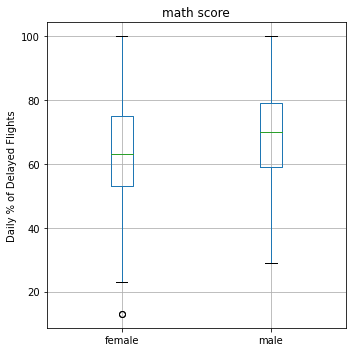

In [10]:
ax = df.boxplot(by='gender', column='math score',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

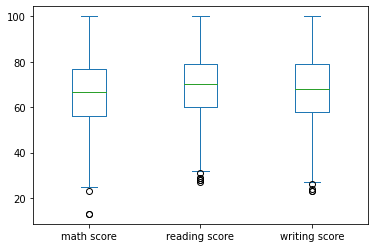

In [3]:
df.plot.box(df)

<function matplotlib.pyplot.show(*args, **kw)>

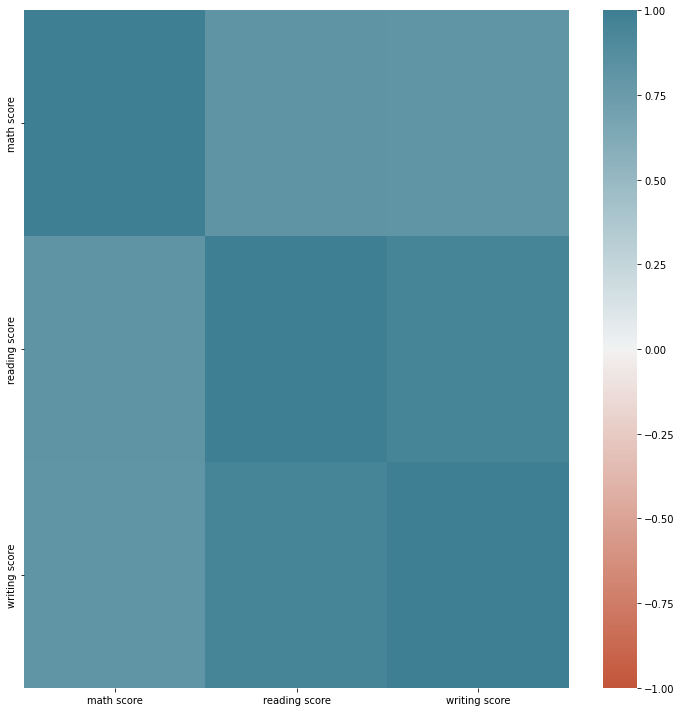

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)
plt.tight_layout()

plt.show


(array([652.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 348.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

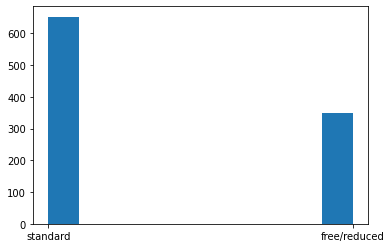

In [12]:
plt.hist(df['lunch'])

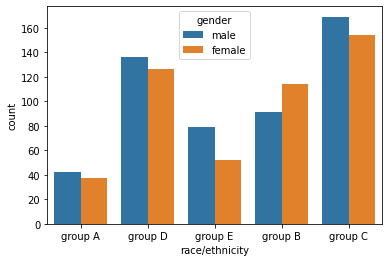

In [13]:
sns.countplot(data=df, x="race/ethnicity", hue="gender")

## Anomalien erkennen

In [14]:
for x in df.columns:
  print(df[x][df[x].isna()])

Series([], Name: gender, dtype: object)
Series([], Name: race/ethnicity, dtype: object)
Series([], Name: parental level of education, dtype: object)
Series([], Name: lunch, dtype: object)
Series([], Name: test preparation course, dtype: object)
Series([], Name: math score, dtype: int64)
Series([], Name: reading score, dtype: int64)
Series([], Name: writing score, dtype: int64)


In [32]:
ng = df["math score"].value_counts() 

fig = px.bar(y = ng.values,
             x = ng.index,
             color = ng.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text = ng.values,
             title = "Score Mathematics",
             template = "plotly_white"
             )

fig.update_layout(
    xaxis_title = "Score",
    yaxis_title = "Number of people",
    font = dict(size=17,family="Franklin Gothic")
    )

fig.show()

In [33]:
ng = df["writing score"].value_counts() 

fig = px.bar(y = ng.values,
             x = ng.index,
             color = ng.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text = ng.values,
             title = "Score Mathematics",
             template = "plotly_white"
             )

fig.update_layout(
    xaxis_title = "Score",
    yaxis_title = "Number of people",
    font = dict(size=17,family="Franklin Gothic")
    )

fig.show()

In [36]:
ng = df["lunch"].value_counts() 

fig = px.bar(y = ng.values,
             x = ng.index,
             color = ng.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text = ng.values,
             title = "Score Mathematics",
             template = "plotly_white"
             )

fig.update_layout(
    xaxis_title = "Score",
    yaxis_title = "Number of people",
    font = dict(size=17,family="Franklin Gothic")
    )

fig.show()

In [ ]:
#Es wurden keine Anomalien gefunden. Die Datensätze sind vollständig. 
#Es gibt keine 'NULL' Werte oder Werte, welche unvorstellbar sind.

#Es gibt eine kleine Abweichung, welche man kaum als Anomalie betrachten kann
#, dass die SChüler auf reduziertes oder gar auf Gratis Essen verzichten & eher auf den Standard zurückgreifen.

## Gruppierungen analysieren

In [37]:
cond1 = df.groupby(['race/ethnicity']).mean()
cond1.head(10)

#Hier wird nach Gruppen gruppiert, welche durchschnittlich am besten bei den Tests abschliesst. 

,math score,reading score,writing score
race/ethnicity,,,
group A,65.215190,68.556962,66.974684
group B,63.170732,67.102439,65.736585
group C,63.130031,66.383901,64.523220
group D,69.267176,72.087786,72.259542
group E,74.465649,72.526718,70.213740


In [38]:
cond1 = df.groupby(['parental level of education']).mean()

cond1.head(10)

#Man überprüft, ob die Schüler besser abschneiden, wenn die Eltern einen besseren Level von Bildung haben.

,math score,reading score,writing score
parental level of education,,,
associate's degree,69.536946,70.985222,70.113300
bachelor's degree,71.491071,74.008929,74.410714
high school,65.207921,67.400990,64.846535
master's degree,71.585714,75.428571,75.885714
some college,65.297297,68.045045,66.734234
some high school,60.701571,64.408377,62.539267


In [39]:
cond1 = df.groupby(['writing score', 'lunch']).mean()

cond1.tail(10)

#Der Sinn dieser Gruppierungen ist es Zusammenhänge zufinden zwischen Writing score 
#, ob dies abhängig ist vom Mittagessen, welches die Schüler konsumieren.

math score  reading score
writing score lunch                                  
94            standard       82.600000      88.600000
95            free/reduced   78.500000      94.500000
              standard       91.400000      92.800000
96            standard       88.666667      95.000000
97            standard       86.888889      95.444444
98            free/reduced   92.000000     100.000000
99            free/reduced   84.000000     100.000000
              standard       87.000000      98.000000
100           free/reduced   83.000000      95.000000
              standard       93.882353      98.764706

In [ ]:
df['reading score'].max()

100

## Korrelation von Variablen feststellen

In [40]:
df.corr(method ='pearson') 

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


In [44]:
df.corr(method ='kendall') 

,math score,reading score,writing score
math score,1.000000,0.626914,0.608615
reading score,0.626914,1.000000,0.821283
writing score,0.608615,0.821283,1.000000


In [42]:
df.corr(method ='spearman')

,math score,reading score,writing score
math score,1.000000,0.814258,0.798316
reading score,0.814258,1.000000,0.950767
writing score,0.798316,0.950767,1.000000


In [ ]:
#Es wurden keine nutzenswerte Daten gefunden, also ist dieser Schritt aus der Sicht des Devs unnötig.

## Hypothesen aufstellen

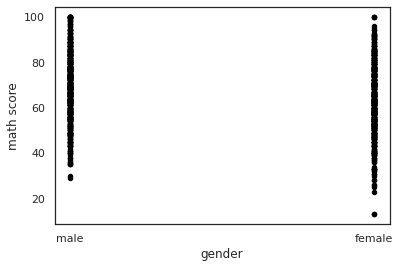

In [68]:
df.plot.scatter(x = 'gender', y = 'math score', c = 'black', s = 20); #Diagramm 1

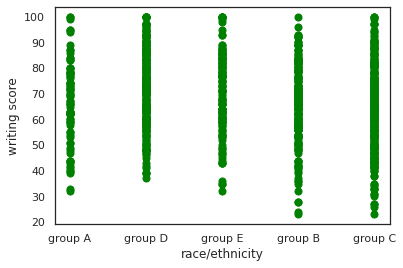

In [46]:
df.plot.scatter(x = 'race/ethnicity', y = 'writing score', c = 'green', s = 50); #Diagramm 2

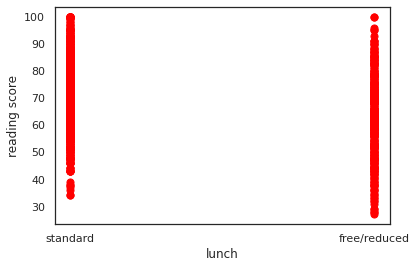

In [62]:
df.plot.scatter(x = 'lunch', y = 'reading score', c = 'red', s = 50); #Diagramm 3


Hier sieht man drei Diagramme, welche alle 3 was anderes anzeigen. Nun wird analysiert, weswegen bei diesen Digrammen manche diese Prüfung schlechter absolviert haben als manch andere.

Ausreisser
*  Digramm 1: Die Frauen haben im Schnitt schlechter als die Männer absolviert.
*  Diagramm 2: Manche Gruppierungen haben sehr deutliche Ausreisse nach unten.
*  Diagramm 3: Schüler, welche Standard zum Mittag konsumieren schneiden besser ab.

Es ist sehr ungewöhnlich, dass bei jeden Fall durch gewisse Anpassungen Schüler schlechter abschneiden.

Hypothese: 

*  Digramm 1: Es schneiden Männer diese Mathematik Prüfung besser ab, da deutlich mehr Männer sich besser auf diese vorbereitet haben. 

*   Diagramm 2: Die Gruppierung welche schlechter abgeschnitten haben, dessen Eltern haben einen schlechtern Abschluss, aufgrund dessen schliessen die schlechter ab.

*   Digramm 3: Personen, welche das Standard konsumieren schliessen besser ab, da diese einfach mehr Wert auf das Essen legen und auch bereit sind mehr zu investieren für eine gute Mahlzeit sowie auch mehr investieren für eine gute Punkzahl in der Prüfung

## Hypothesen analysieren`



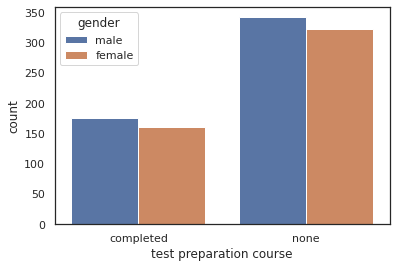

In [69]:
#Hypothese 1
sns.countplot(data=df, x="test preparation course", hue="gender")

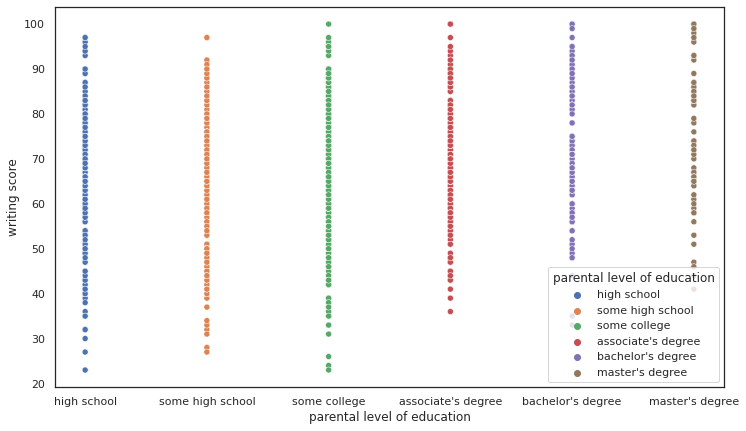

In [70]:
# Hypothese 2

plt.figure(figsize = (12,7))
sns.scatterplot(data=df, x="parental level of education", y="writing score", hue="parental level of education")

In [71]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [72]:
cond1 = df.groupby(['parental level of education', 'race/ethnicity']).count()
cond1

gender  lunch  \
parental level of education race/ethnicity                  
associate's degree          group A             11     11   
                            group B             40     40   
                            group C             75     75   
                            group D             50     50   
                            group E             27     27   
bachelor's degree           group A             14     14   
                            group B             20     20   
                            group C             35     35   
                            group D             29     29   
                            group E             14     14   
high school                 group A             15     15   
                            group B             39     39   
                            group C             58     58   
                            group D             59     59   
                            group E             31     31   
master's degree             group A              8      8   
                            group B             19     19   
                            group C             20     20   
                            group D             16     16   
                            group E              7      7   
some college                group A             20     20   
                            group B             49     49   
                            group C             69     69   
                            group D             57     57   
                            group E             27     27   
some high school            group A             11     11   
                            group B             38     38   
                            group C             66     66   
                            group D             51     51   
                            group E             25     25   

                                            test preparation course  \
parental level of education race/ethnicity                            
associate's degree          group A                              11   
                            group B                              40   
                            group C                              75   
                            group D                              50   
                            group E                              27   
bachelor's degree           group A                              14   
                            group B                              20   
                            group C                              35   
                            group D                              29   
                            group E                              14   
high school                 group A                              15   
                            group B                              39   
                            group C                              58   
                            group D                              59   
                            group E                              31   
master's degree             group A                               8   
                            group B                              19   
                            group C                              20   
                            group D                              16   
                            group E                               7   
some college                group A                              20   
                            group B                              49   
                            group C                              69   
                            group D                              57   
                            group E                              27   
some high school            group A                              11   
                            group B                              38   
                            grou

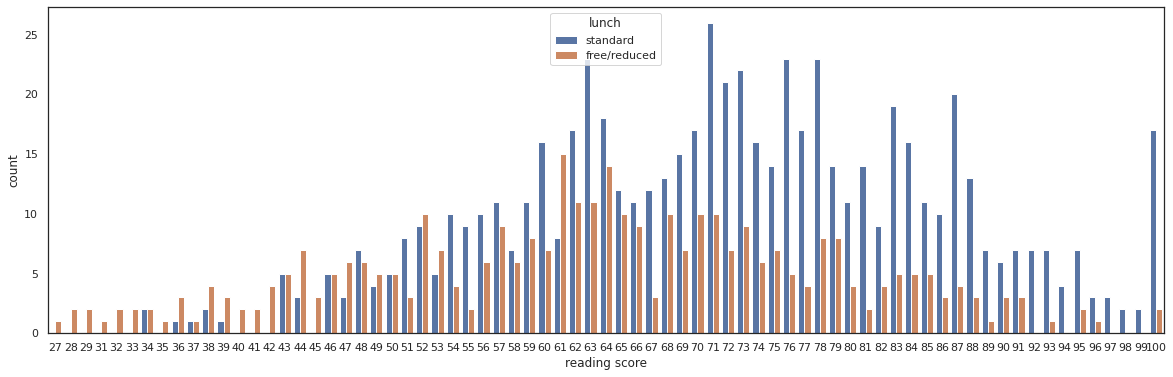

In [73]:
# Hypothese 3
plt.figure(figsize=(20,6))
sns.countplot(data=df, x="reading score", hue="lunch")


In [74]:
df[df['lunch'] == 'standard'].count()

gender                         652
race/ethnicity                 652
parental level of education    652
lunch                          652
test preparation course        652
math score                     652
reading score                  652
writing score                  652
dtype: int64

In [75]:
df[df['lunch'] == 'free/reduced'].count()

gender                         348
race/ethnicity                 348
parental level of education    348
lunch                          348
test preparation course        348
math score                     348
reading score                  348
writing score                  348
dtype: int64

Es wurde auf allen Hypothesen eine nachvollziehbare Antwort gegeben.

Antwort-Hypothese: 

*  Digramm 1: Es absolvieren mehr Männliche Personen den preparation course, aufgrund dessen schliessen die auch besser ab.

*   Diagramm 2: Es gibt eine klare Struktur, dass tiefer gebildete Eltern eine Auswirkung aufs Kind haben und diese somit schlechter werden.

*   Digramm 3: Es absolvieren mehr Männliche Personen den preparation course, aufgrund dessen schliessen die auch besser ab

# Modellieren

## Imports

In [78]:
%matplotlib inline

# Pandas
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pylab as plt

# Farben von Pyplot
from matplotlib.colors import ListedColormap

# Numpy (performante listen)
import numpy as np

import missingno as mn

# Datasets, Klassifikatoren und Beurteilungshelfer
from sklearn import svm, metrics, neighbors, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
df_mpg = sns.load_dataset('mpg')
df_iris = sns.load_dataset('iris')
df_tips = sns.load_dataset('tips')
df_geyser = sns.load_dataset('geyser')

## Grundlage

In [80]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [117]:
df_2 = df.drop(['gender', 'race/ethnicity', 'lunch', 'test preparation course', 'reading score', 'writing score'], axis=1)

In [134]:
df_02

,math score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,67,0,0,1,0,0,0
1,40,0,0,0,0,0,1
2,59,0,0,0,0,1,0
3,77,0,0,1,0,0,0
4,78,1,0,0,0,0,0
...,...,...,...,...,...,...,...
995,73,0,0,1,0,0,0
996,85,1,0,0,0,0,0
997,32,0,0,0,0,0,1
998,73,0,0,0,0,1,0


In [ ]:
df_02 = pd.get_dummies(df_2, columns=['parental level of education'])
df_02

In [120]:
df_2.dtypes

parental level of education    object
math score                      int64
dtype: object

In [ ]:
df_02.shape

## Modeling


In [180]:
def eval_regression(test, predict):
  print("MSE: %.2f" % mean_squared_error(test, predict))
  print("R2-Score: %.2f" % r2_score(test, predict))

In [181]:
X_Exams = df_02.drop("math score", axis=1)
y_Exams = df_02["math score"]

X_Exams_train, X_Exams_test, y_Exams_train, y_Exams_test = train_test_split(X_Exams, y_Exams, test_size=0.3)

In [182]:
tips_clf_linear = linear_model.LinearRegression()
tips_clf_linear.fit(X_Exams_train, y_Exams_train)

predict_tips_linear = tips_clf_linear.predict(X_Exams_test)

In [183]:
clf_svr = svm.SVR()
clf_svr.fit(X_Exams_train, y_Exams_train)

predict_tips_svr = clf_svr.predict(X_Exams_test)

In [184]:
clf_ridge = linear_model.Ridge()
clf_ridge.fit(X_Exams_train, y_Exams_train)

predict_tips_ridge = clf_ridge.predict(X_Exams_test)

In [185]:
eval_regression(y_Exams_test, predict_tips_linear) # Modell 1

MSE: 227.74
R2-Score: 0.04


In [186]:
eval_regression(y_Exams_test, predict_tips_ridge) # Modell 2

MSE: 227.71
R2-Score: 0.04


In [187]:
eval_regression(y_Exams_test, predict_tips_svr) # Modell 3

MSE: 228.03
R2-Score: 0.04
